In [67]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [68]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
# define paths for the datasets to be used
path_rental = "Average Rents_Concat.csv"
path_units = "Number_of_Units_Concat.csv"
path_vacancy = "Vacancy Rate Concat.csv"

In [70]:
#read into files to see the column names to create a function
rental_df = pd.read_csv(path_rental)
rental_df.columns


Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [71]:
#identify how provinces are named in the dataset
print(rental_df["Province"].unique())


['Nfld.Lab.' 'N.S.' 'N.B.' 'Que' 'Ont.' 'Man.' 'Sask.' 'Alta' 'B.C.']


In [72]:
#Create a funtion to extract based on the province and year 
def data_set(filepath,Province,Year,column):
    get_df = pd.read_csv(filepath)
    df = get_df.loc[(rental_df["Year"] == Year )& (get_df["Province"] == Province)]
    df_Province = df[(df[column]!=0)]
    return df_Province
    

In [73]:
# combined dataset quantitative analysis to determine outliers
def data_set_combined(filepath,Year,column):
    get_df = pd.read_csv(filepath)
    df = get_df.loc[(rental_df["Year"] == Year )]
    df = df[(df[column]!=0)]
    return df

In [74]:
combined_df = data_set_combined(path_rental,2022,"Total ")

In [75]:
combined_df

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
7160,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,0.0,0.0,0.0,1342.0,2022
7161,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,727.0,933.0,1111.0,1056.0,1009.0,2022
7162,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,809.0,0.0,613.0,2022
7163,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,842.0,792.0,955.0,1048.0,901.0,2022
7165,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Apt & Other,0.0,733.0,931.0,791.0,830.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8939,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Colwood,Apt & Other,0.0,1226.0,1495.0,0.0,1365.0,2022
8940,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,West Shore/Other,Row,0.0,0.0,0.0,2513.0,2513.0,2022
8943,B.C.,Victoria,Oak Bay,Oak Bay South,Apt & Other,0.0,1282.0,1732.0,0.0,1542.0,2022
8945,B.C.,Victoria,Oak Bay,Oak Bay North,Apt & Other,1107.0,1226.0,1679.0,0.0,1405.0,2022


In [76]:
#Check if the data set function works fine and get the provinces
Year = 2022
column = "Total "
df_Ontario = data_set(path_rental, "Ont.",Year,column)
df_Quebec = data_set(path_rental,"Que",Year,column)
df_BC = data_set(path_rental, "B.C.",Year,column)
df_Alberta = data_set(path_rental, "Alta",Year,column)
df_sask = data_set(path_rental,"Sask.",Year,column)
df_NovaScotia = data_set(path_rental,"N.S.",Year,column)
df_Ontario

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
7669,Ont.,Barrie,Barrie,Downtown,Apt & Other,1067.0,1294.0,1571.0,1516.0,1412.0,2022
7671,Ont.,Barrie,Barrie,West End,Apt & Other,0.0,0.0,1399.0,0.0,1422.0,2022
7673,Ont.,Barrie,Barrie,North Barrie,Apt & Other,0.0,1341.0,1516.0,0.0,1423.0,2022
7675,Ont.,Barrie,Barrie,East End,Apt & Other,0.0,1311.0,1464.0,0.0,1398.0,2022
7676,Ont.,Barrie,Barrie,South Barrie,Row,0.0,0.0,0.0,1939.0,1861.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8353,Ont.,Windsor,West,University,Apt & Other,742.0,955.0,1080.0,1077.0,984.0,2022
8355,Ont.,Windsor,West,Sandwich,Apt & Other,795.0,962.0,1103.0,0.0,1017.0,2022
8357,Ont.,Windsor,West,Southwest Windsor,Apt & Other,0.0,0.0,1101.0,0.0,1056.0,2022
8359,Ont.,Windsor,Amherstburg,Amherstburg,Apt & Other,0.0,1165.0,1348.0,0.0,1259.0,2022


In [77]:
#define Provinces name in the list
Province = ['Ont.', "Que" ,"Alta",'B.C.', "Sask.","N.S."]


In [78]:
#quantitative analysis to find the number of outliers
upper_quartile = []
lower_quartile = []
iqr = []
upper_bound = []
lower_bound = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for pro in Province:
    outliers_counter = 0
   
    get_quantiles = combined_df["Total "].loc[combined_df["Province"]== pro].quantile([0.25,0.5,0.75])
    upper_quartile_each = get_quantiles[0.75]
    lower_quartile_each = get_quantiles[0.25]
    iqr_each = upper_quartile_each-lower_quartile_each
    upper_bound_each = upper_quartile_each + (1.5* iqr_each)
    lower_bound_each = lower_quartile_each - (1.5* iqr_each)
  
    
    # add subset 
    upper_quartile.append(upper_quartile_each)
    lower_quartile.append(lower_quartile_each)
    iqr.append(iqr_each)
    upper_bound.append(upper_bound_each)
    lower_bound.append(lower_bound_each)
    
    # Determine outliers using upper and lower bounds
    for each in (combined_df["Total "].loc[combined_df["Province"]== pro]):
        if (each > upper_bound_each) | (each < lower_bound_each):
            outliers_counter = outliers_counter + 1
    outliers.append(outliers_counter)
    print(f"{pro} has {outliers_counter} outliers")

Ont. has 5 outliers
Que has 8 outliers
Alta has 1 outliers
B.C. has 6 outliers
Sask. has 1 outliers
N.S. has 0 outliers


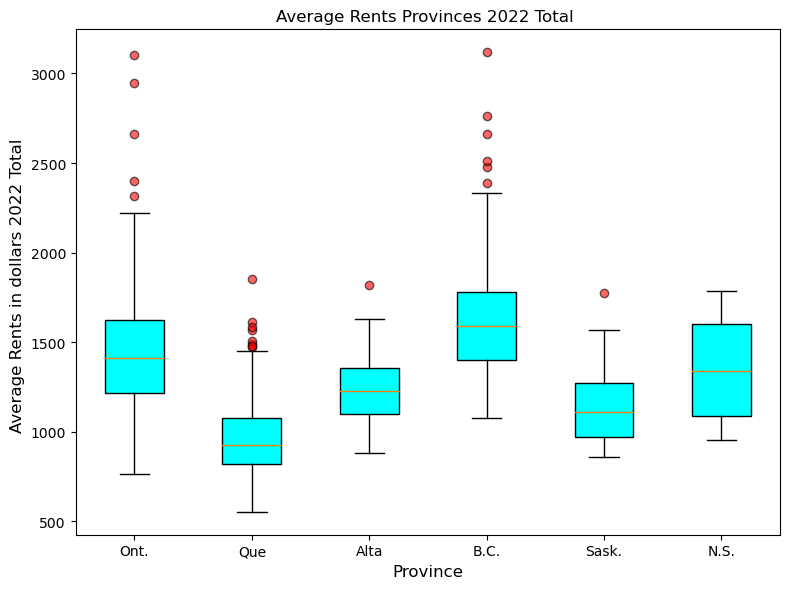

In [79]:
# create plots using the column for we want to focus on
x_data = [df_Ontario[column],df_Quebec[column],df_Alberta[column],df_BC[column],df_sask[column],df_NovaScotia[column]]
out_patch = dict(markerfacecolor = "red", marker = "o",alpha = 0.6)
box_plot = plt.boxplot(x = x_data,labels = Province, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*9
plt.xlabel("Province",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12)
plt.title(f"Average Rents Provinces {Year} {column}",fontsize = 12)

for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Provinces {Year} {column}.png")          
plt.show()

In [80]:
#get columns for Ontario
df_Ontario.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [81]:
#get unique names to make a list for further analysis
df_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [82]:
# make a list to plot and use in the box plot x axis label
Centre_of_interest = ['Barrie', "Hamilton",
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Toronto',
       'Windsor']

In [83]:
#get the data for the column  and the y axis 
Centre_data = []
for each in Centre_of_interest:
    df = df_Ontario[(df_Ontario["Centre"])==each]
    Centre_data.append(df[column])
    

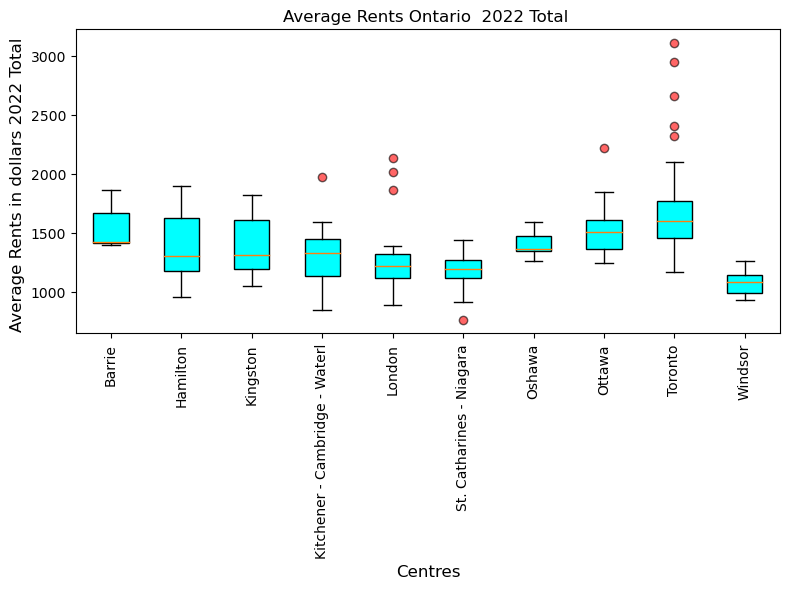

In [84]:
# plot the data for the province based on the zones
x_data = Centre_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Centre_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Centre_of_interest)
plt.xlabel("Centres",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Ontario  {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Ontario {Year} {column}.png") 
plt.tight_layout
plt.show()

In [85]:
# extract data for Toronto
df_Toronto = df_Ontario[(df_Ontario["Centre"]=="Toronto")]

In [86]:
df_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
8065,Ont.,Toronto,Toronto (Central),Waterfront Communities -The Island,Apt & Other,0.0,1986.0,2321.0,0.0,2103.0,2022
8067,Ont.,Toronto,Toronto (Central),Moss Park/Regent Park,Apt & Other,1274.0,1824.0,2340.0,3237.0,1930.0,2022
8069,Ont.,Toronto,Toronto (Central),Cabbagetown-S. St. James Town,Apt & Other,1374.0,1593.0,2126.0,0.0,1654.0,2022
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8323,Ont.,Toronto,Pickering/Ajax/Uxbridge,Ajax/Pickering,Apt & Other,0.0,1193.0,1533.0,1608.0,1556.0,2022
8325,Ont.,Toronto,Pickering/Ajax/Uxbridge,Uxbridge,Apt & Other,0.0,1389.0,1575.0,0.0,1455.0,2022
8327,Ont.,Toronto,Milton/Halton Hills,Milton/Halton Hills,Apt & Other,911.0,1309.0,1523.0,1791.0,1444.0,2022
8329,Ont.,Toronto,Orangeville/Mono,Orangeville/Mono,Apt & Other,0.0,1269.0,1455.0,1588.0,1372.0,2022


In [87]:
# get unique zones
df_Toronto["Zone"].unique()

array(['Toronto (Central)', 'Toronto (East)', 'Toronto (North)',
       'Toronto (West)', 'Etobicoke (South)', 'Etobicoke (Central)',
       'Etobicoke (North)', 'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Brampton (East)', 'Oakville',
       'Richmond Hill/Vaughan/King', 'Aurora, Newmkt, Whit-St.',
       'Markham', 'Pickering/Ajax/Uxbridge', 'Milton/Halton Hills',
       'Orangeville/Mono', 'Bradford/West Gwillimbury/New Tecumseth'],
      dtype=object)

In [88]:
Zones_of_interest = ['Toronto (Central)', 'Toronto (North)', 'Toronto (West)',
       'Etobicoke (South)', 'Etobicoke (Central)', 'Etobicoke (North)',
       'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Oakville']

In [89]:
Zonal_data = []
for each in Zones_of_interest:
    df = df_Toronto[(df_Toronto["Zone"])==each]
    Zonal_data.append(df[column])
    
    

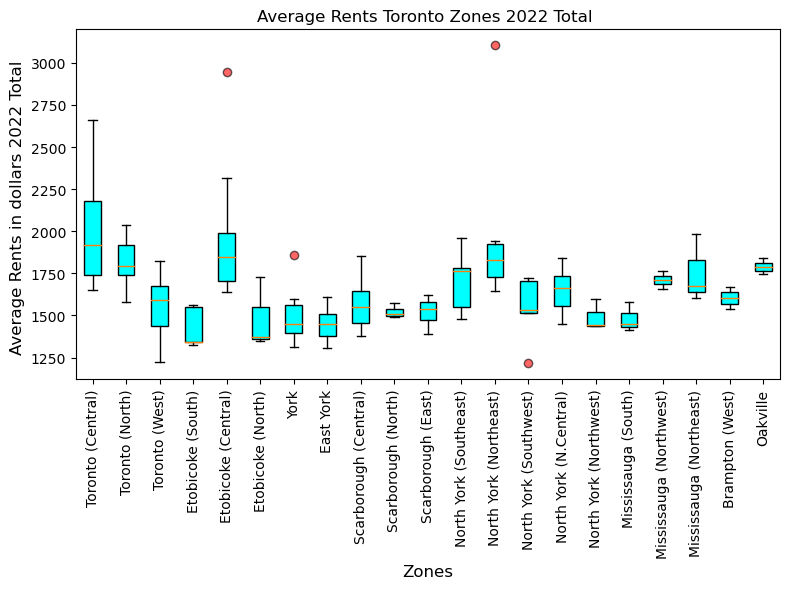

In [90]:
#plot the data
x_data = Zonal_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Zones_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Zones_of_interest)
plt.xlabel("Zones",fontsize = 12)
plt.ylabel(f"Average Rents in dollars {Year} {column}",fontsize = 12,)
plt.title(f"Average Rents Toronto Zones {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Toronto {Year} {column}.png") 
plt.tight_layout
plt.show()

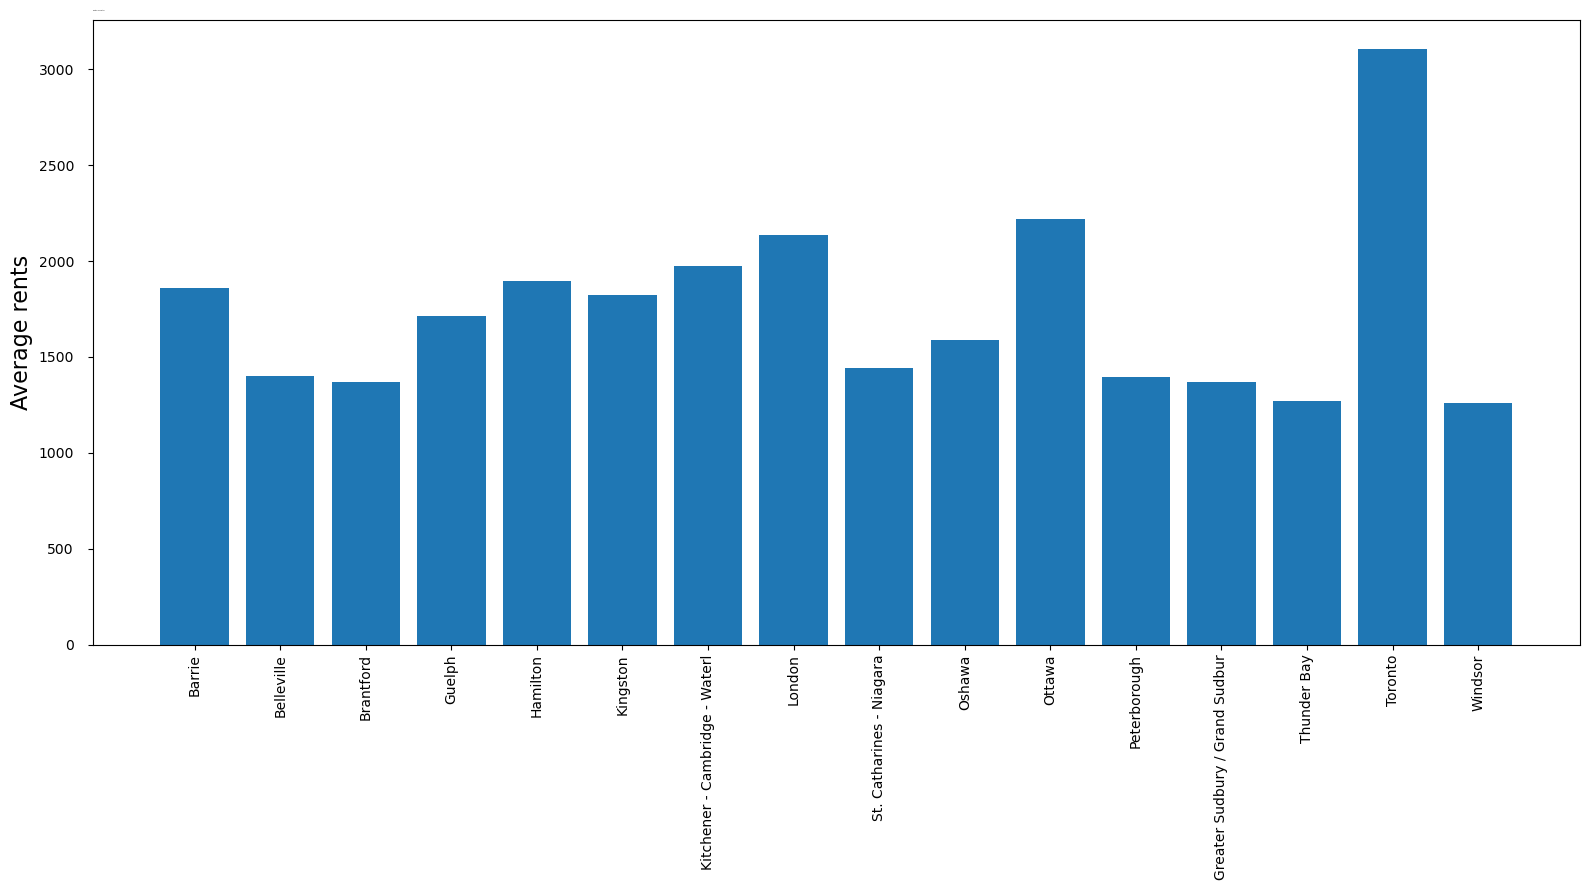

In [115]:

Zones = df_Ontario['Centre']
Rent = df_Ontario['Total ']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.bar(Zones, Rent)

# Add padding between axes and labels
ax.xaxis.set_tick_params(rotation = 90)
ax.yaxis.set_tick_params(pad = 10)
plt.ylabel("Average rents",fontsize = 16)
                         

# Add Plot Title
ax.set_title("Rents In Onatrio",
             loc ='left',fontsize = 1 )
# Show Plot
plt.show()
